### Introduction

With this article, we aim to concretise the presence of bias with the help of visualisations, provide a brief taxonomy of fairness criteria that have been suggested over the past few years, illustrate how these criteria might not always lead to the same outcome, and finally demonstrate the effectiveness of causal methods in coming up with fair machine learning models.

### Bias in Datasets

Big data is in large parts responsible for the explosion of deep learning methods. This rise in big data also marked in what Kate Crawford [cite] termed as "data fundamentalism", which is the notion that correlation always indicates causation. 

The quintessential example of bias seeping into learning models that later affect certain groups of people is the Correctional Offender Management Profiling for Alternative Sanctions (COMPAS) software, which is used by courts in the US to make parole decisions. It was found that the software had a bias against African-Americans, assigning higher risk scores to offenders of African-American origins compared to Caucasians with the same profile.

More than an issue with machine learning models themselves, often the issue seems to be with the data being used. For example, it has been found that face classificaton models may not perform as well for women of color, or speech transcription may have higher error rates for African Americans than White Americans [1].

### The Case of Google Translate

Effects of this bias in datasets is evident in tools which are available for public use. Consider the Google Translate tool. As depicted below, for most gender-neutral languages, Translate converts a sentence with the pronoun 'She' to a sentence with the pronoun 'He'.

![SegmentLocal](google_gif.gif "segment")

The experiment performed is as follows. [5] curated a list of jobs under a larger umbrella of occupation types, and ther corresponding translations in several languages of which 12 are gender-neutral, i.e., they use the same pronouns for both males and females. For example, the category entertainment contains professions like 'Singer', 'Writer', 'Musician', etc. Next, we supply sentences of the form "He/She is a/an x" where x will be the profession in English, and obtain their translation in the chosen language. Next, we supply this translated sentence back and convert it to English. In the ideal case, for languages which do have gender pronouns, the pronoun choice should remain preserved. For gender-neutral languages as well, we would ideally expect one of the two outcomes, that the translation contains the same gender as the original language, or that the tool returns both the possibilities. However, as shown in the below plot, the tool converts almost all the sentences to have the pronoun 'He'.

Based on list of occupations and gender-neutral languages curated by [5], Translate  most languages converted a majority of pronouns to 'He' instead of returning a gender-neutral answer.

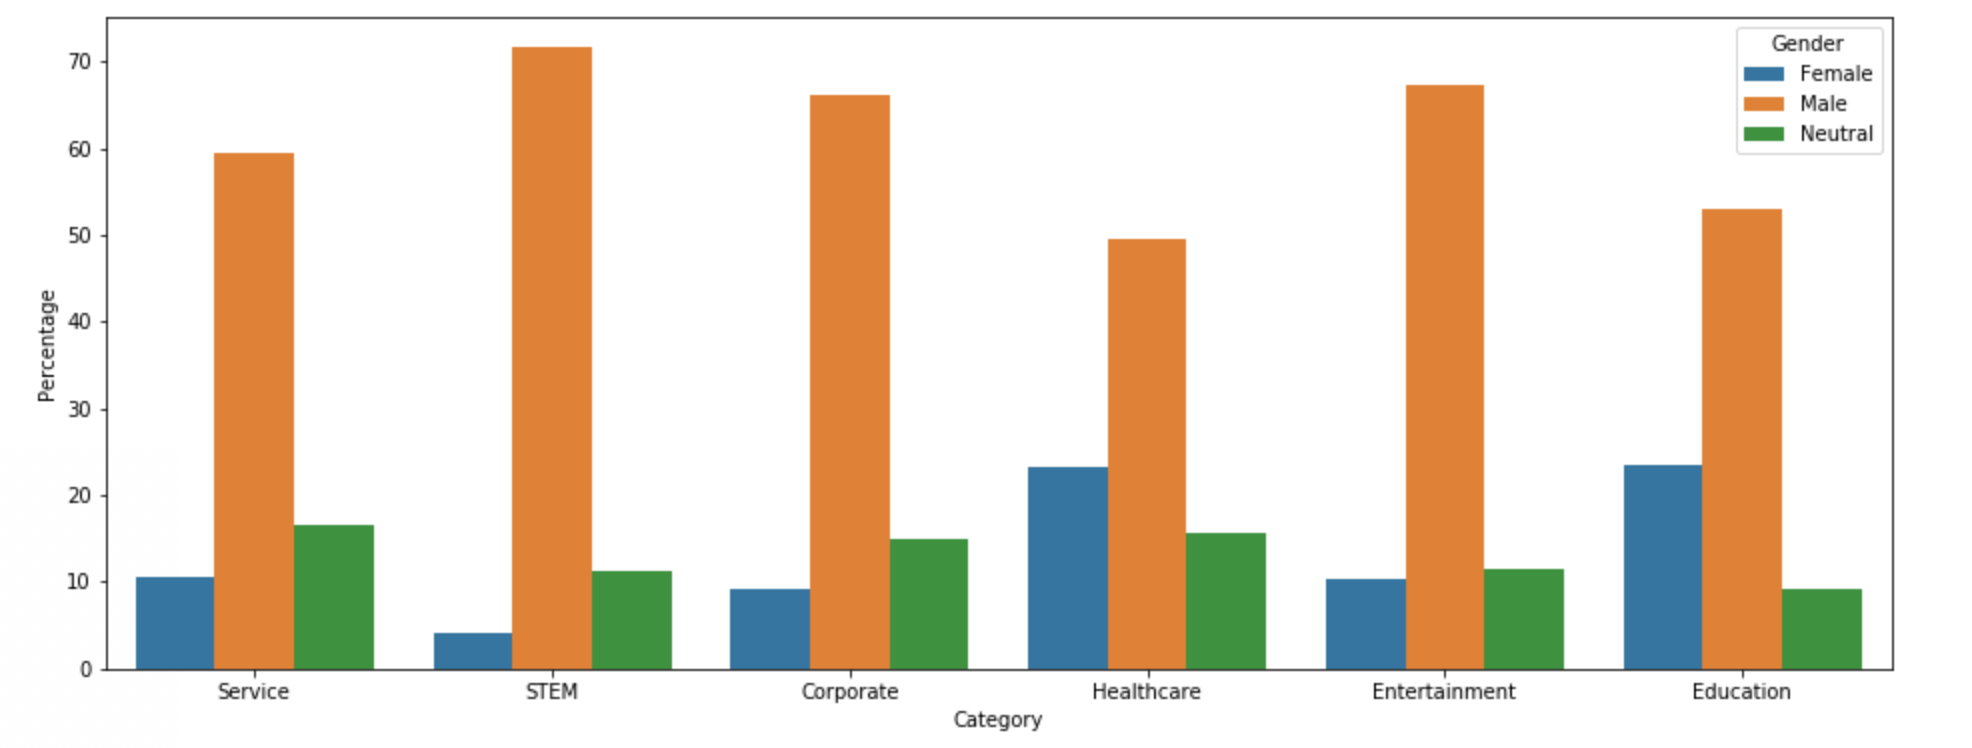

The figure below shows female participation under various categories of profession, which illustrates the stark contrast in the reality and the results suggested by models trained on big data.

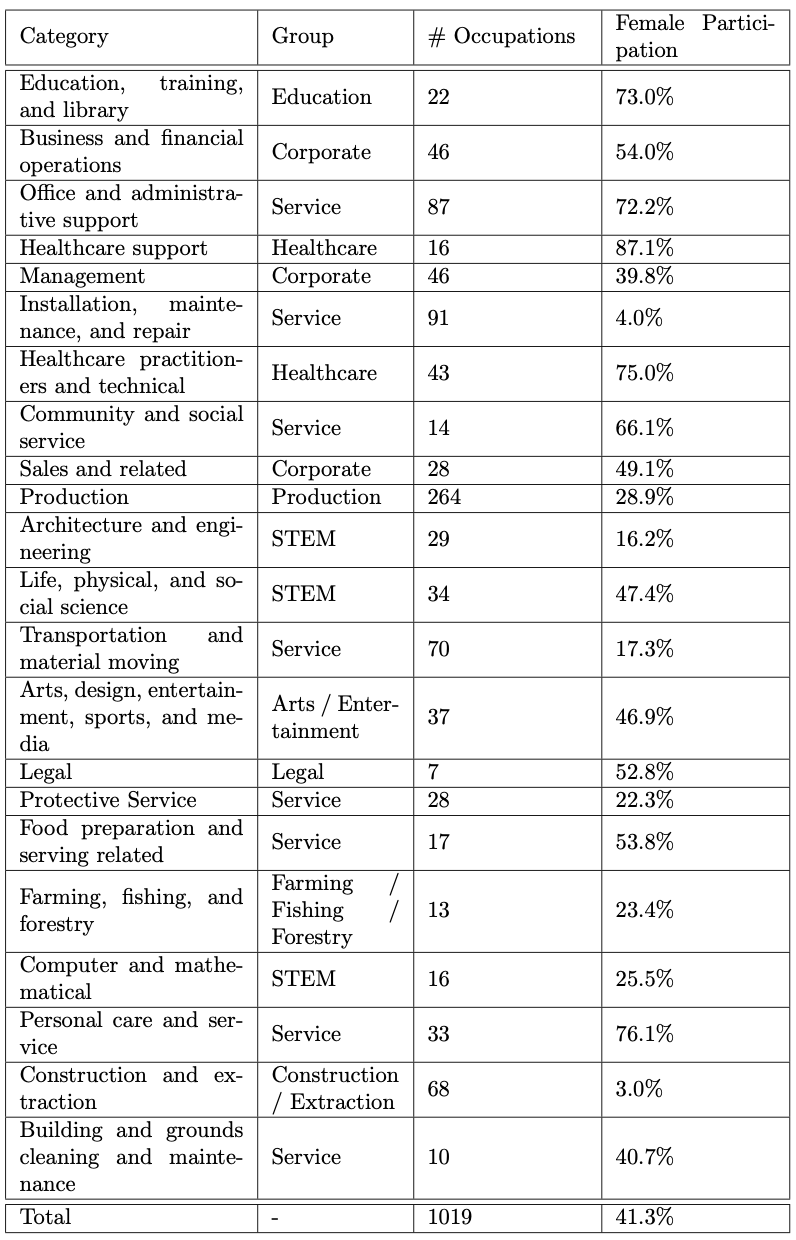

Following wide-spread criticism, Google did began providing gender-neutral translations as well, but as evident by the above plots, the efforts made have led to insignificant changes.

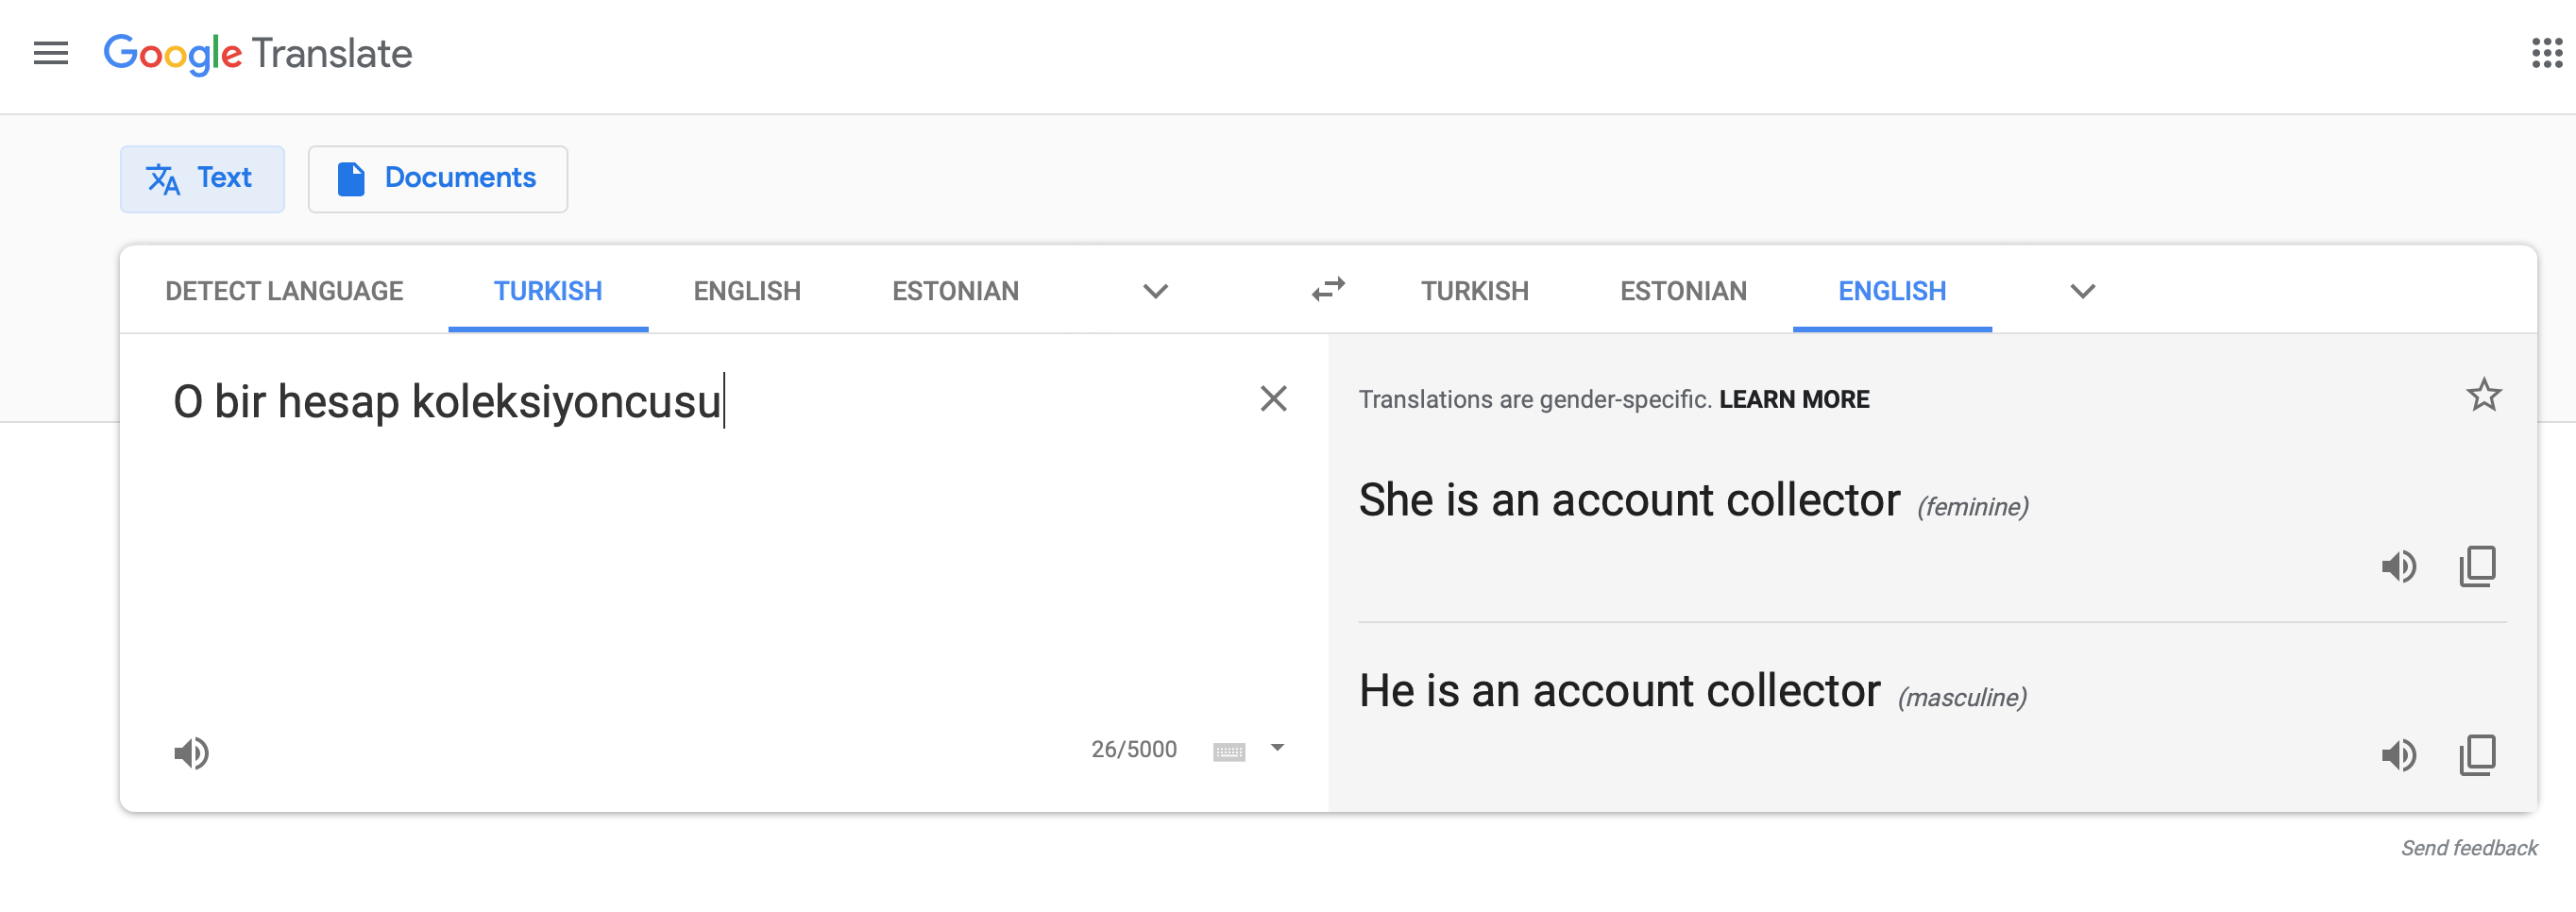

### Word-Embeddings Projecting Gender Stereotypes
Word2Vec is one of the most popular method to learn word embeddings from a corpus. Word embeddings are vector representations of words that can be used to capture the context of a word in a document or finding words similar to it. However, training the Word2Vec model on most large datasets often leads to the model capturing bias present in the data. When words from a pre-trained Word2Vec model [17] were projected onto an axis representing gender in the word embedding space, the bias in the underlying dataset is clearly visible. Choose one of the options below, and zoom in on to see which words are associated with the pronoun 'He' and those with the pronoun 'She'.


In [ ]:
from pyvis import network as net
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pyvis.network import Network
net = Network()


def get_plots(name):
    n_he = name + '_he.txt'
    n_she = name + '_she.txt'
    plt.figure(figsize=(16, 6))
    g = Network(notebook=True, height='500px', width='1000px')

    g.add_node(0, value=10, title='10', label='He', color="#00ff1e")
    g.add_node(1000, value=10, title='10', label='She', color="#dd4b39")

    with open(n_he, 'rb') as f:
        word_no = 0
        for line in f:
            word_no += 1
            temp = line.split()
            word = temp[0]
            weight = temp[1]
            weight = weight.strip('(')
            weight = weight.strip(')')
            weight = float(weight)

            g.add_node(word_no, value=weight * 100, title=str(weight), label=word, color="#00ff1e")
            g.add_edge(0, word_no)

    with open(n_she, 'rb') as f:
        word_no = 1000
        for line in f:
            word_no += 1
            temp = line.split()
            word = temp[0]
            weight = temp[1]
            weight = weight.strip('(')
            weight = weight.strip(')')
            weight = float(weight)

            g.add_node(word_no, value=weight * 100, title=str(weight), label=word, color="#dd4b39")
            g.add_edge(1000, word_no)
    g.show('example.html')  
    display(g.show('example.html'))


toggle = widgets.ToggleButtons(
    options=['Adjectives', 'Debate', 'Leadership', 'Occupation', 'Speak'],
    description='Word Attribute:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Adjectives', 'Debate', 'Leadership', 'Occupation', 'Speak'],
#     icons=['check'] * 3
)
from IPython.display import clear_output

def on_click(change):
    clear_output()
    display(toggle)
    print(change['new'])
    if change['new'] == 'Adjectives':
        get_plots('adjectives')
    elif change['new'] == 'Debate':
        get_plots('debate')  
    elif change['new'] == 'Leadership':
        get_plots('leadership')
    elif change['new'] == 'Occupation':
        get_plots('occupation')
    elif change['new'] == 'Speak':
        get_plots('speak')
    

toggle.observe(on_click, 'value')
display(toggle)
get_plots('Adjectives')

An immediate observation that one can make is the fact that a larger variety of words are associated with the pronoun 'He' than with 'She'. When looking at words related to the concept of 'Leadership', 'He' is associated with words like 'maverick' and 'decisive', while 'She' is associated with words like 'glamorous' and 'overbearing'.

The following work by [21] shows that word embeddings learned on Google News data also learns human stereotypes about gender and religion.

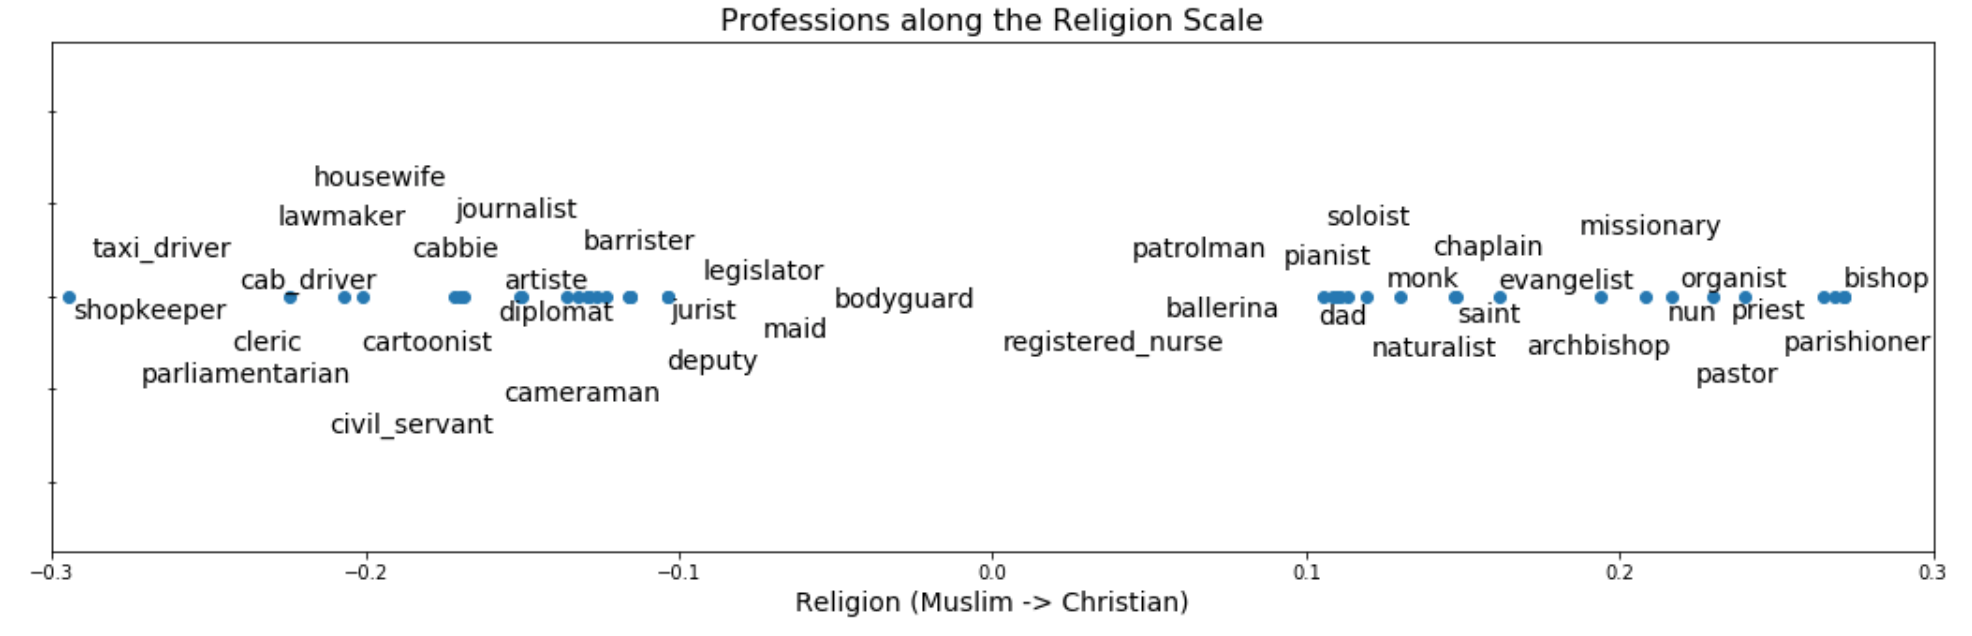

The above plot shows a clear separation between the kinds of occupations associated with people belonging to two different religion.

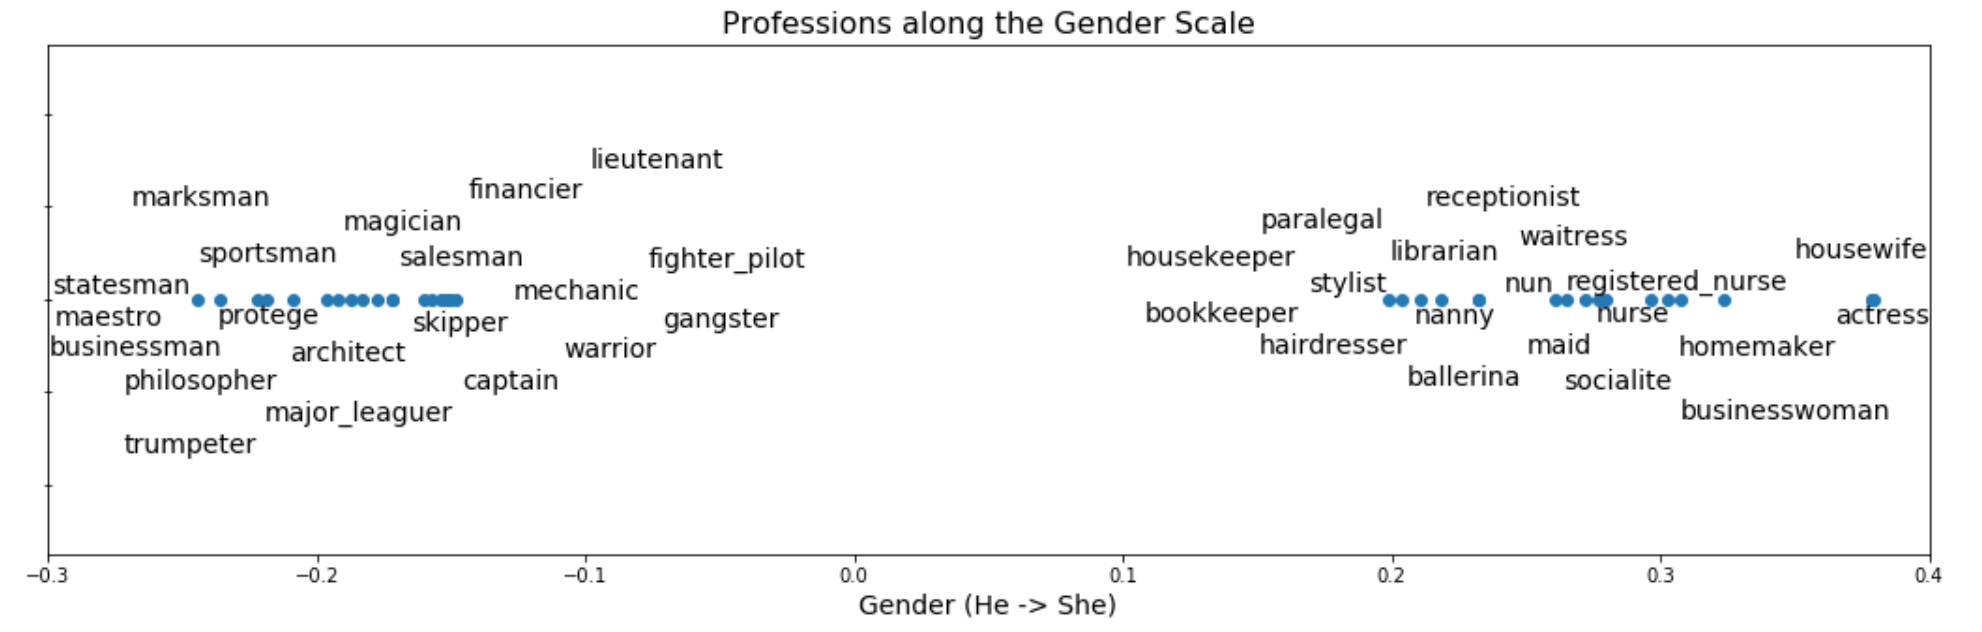

The above plot shows how occupations roles are segregated between males and females.

### Definitions of Fairness

Efforts to measure and mitigate the problem of bias in trained models has led to the development of a number of fairness definitions. Several recent works have shown that many of these definitions are mathematically incompatible with each other [18][19]. This incompatibility represents an unavoidable trade-off, and establishes a fundamental limit on fair machine learning. 

Following are some of the most commonly used definitions of fairness:
(For the below definitions, assume that A represents the protected (sensitive) attribute, X represents the non-protected attributes, Y represents the outcome, and $\hat{Y}$ represents the prediction made by the learning model.


#### Demographic Parity
According to this definition, the percentage of individuals for whom $\hat{Y}$ is 1 should be equal for both the groups A = 0 and A = 1

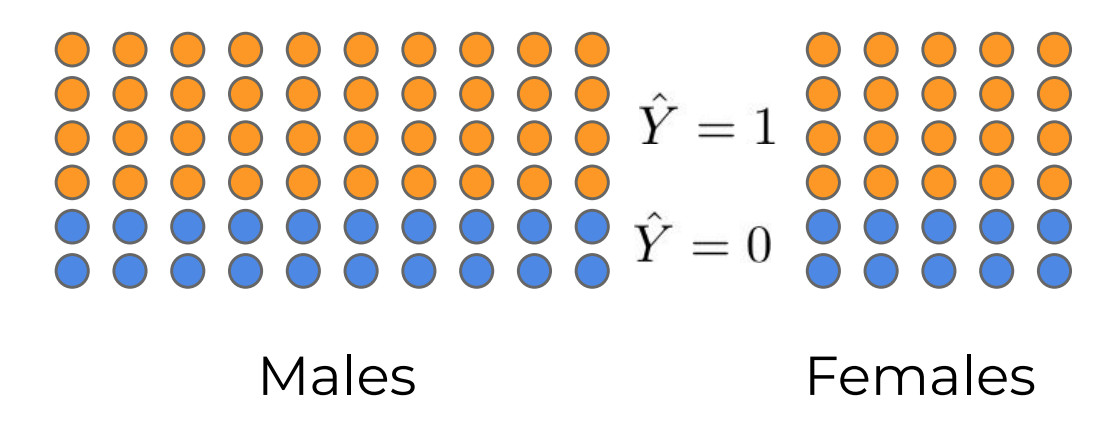

Mathematically, $$p(\hat{Y} = 1 | A = 0) = p(\hat{Y} = 1 | A = 1)$$
indicates that demographic parity is satisfied.

#### Equal False Positive/Negative Rates (EFPRs/EFNRs)

Intuitively, the EFPR requires that if we consider the set of individuals whose outcome Y is 0 then the percentage of individuals for whom $\hat{Y}$ was predicted to be 1 should be equal for both groups. The intuition behind EFNR is also similar.

Mathematically,
$$EFPR \equiv p(\hat{Y} = 1 | Y = 0, A = 0) = p(\hat{Y} = 1 | Y = 0, A = 1)$$

$$EFPR \equiv p(\hat{Y} = 1 | Y = 0, A = 0) = p(\hat{Y} = 1 | Y = 0, A = 1)$$

#### Predictive Parity
Intuitively, this definition requires that Y should be independent of A given $\hat{Y}$.

$$p(Y = 1 | \hat{Y} = 1, A = 0) = p(Y = 1 | \hat{Y} = 1, A = 1)$$
$$p(Y = 0 | \hat{Y} = 0, A = 0) = p(Y = 0 | \hat{Y} = 0, A = 1)$$


Both the above defintions require that the disparity between Y and $\hat{Y}$ should not depend on the sensitive attribute A.



### Incompatible definitions of Fairness
Let's consider the COMPAS software again. When ProPublica made the claim that the system was discriminatory against blacks, the company which made the software reverted back by saying that their model satisfied the criteria of predictive parity, and hence was fair.

Let's look at the distribution of low and high risk scores for the Black and White race separately. From the plot below, it looks like for the individuals who were assigned a low risk score, similar percentage of people did not reoffend for both the groups.



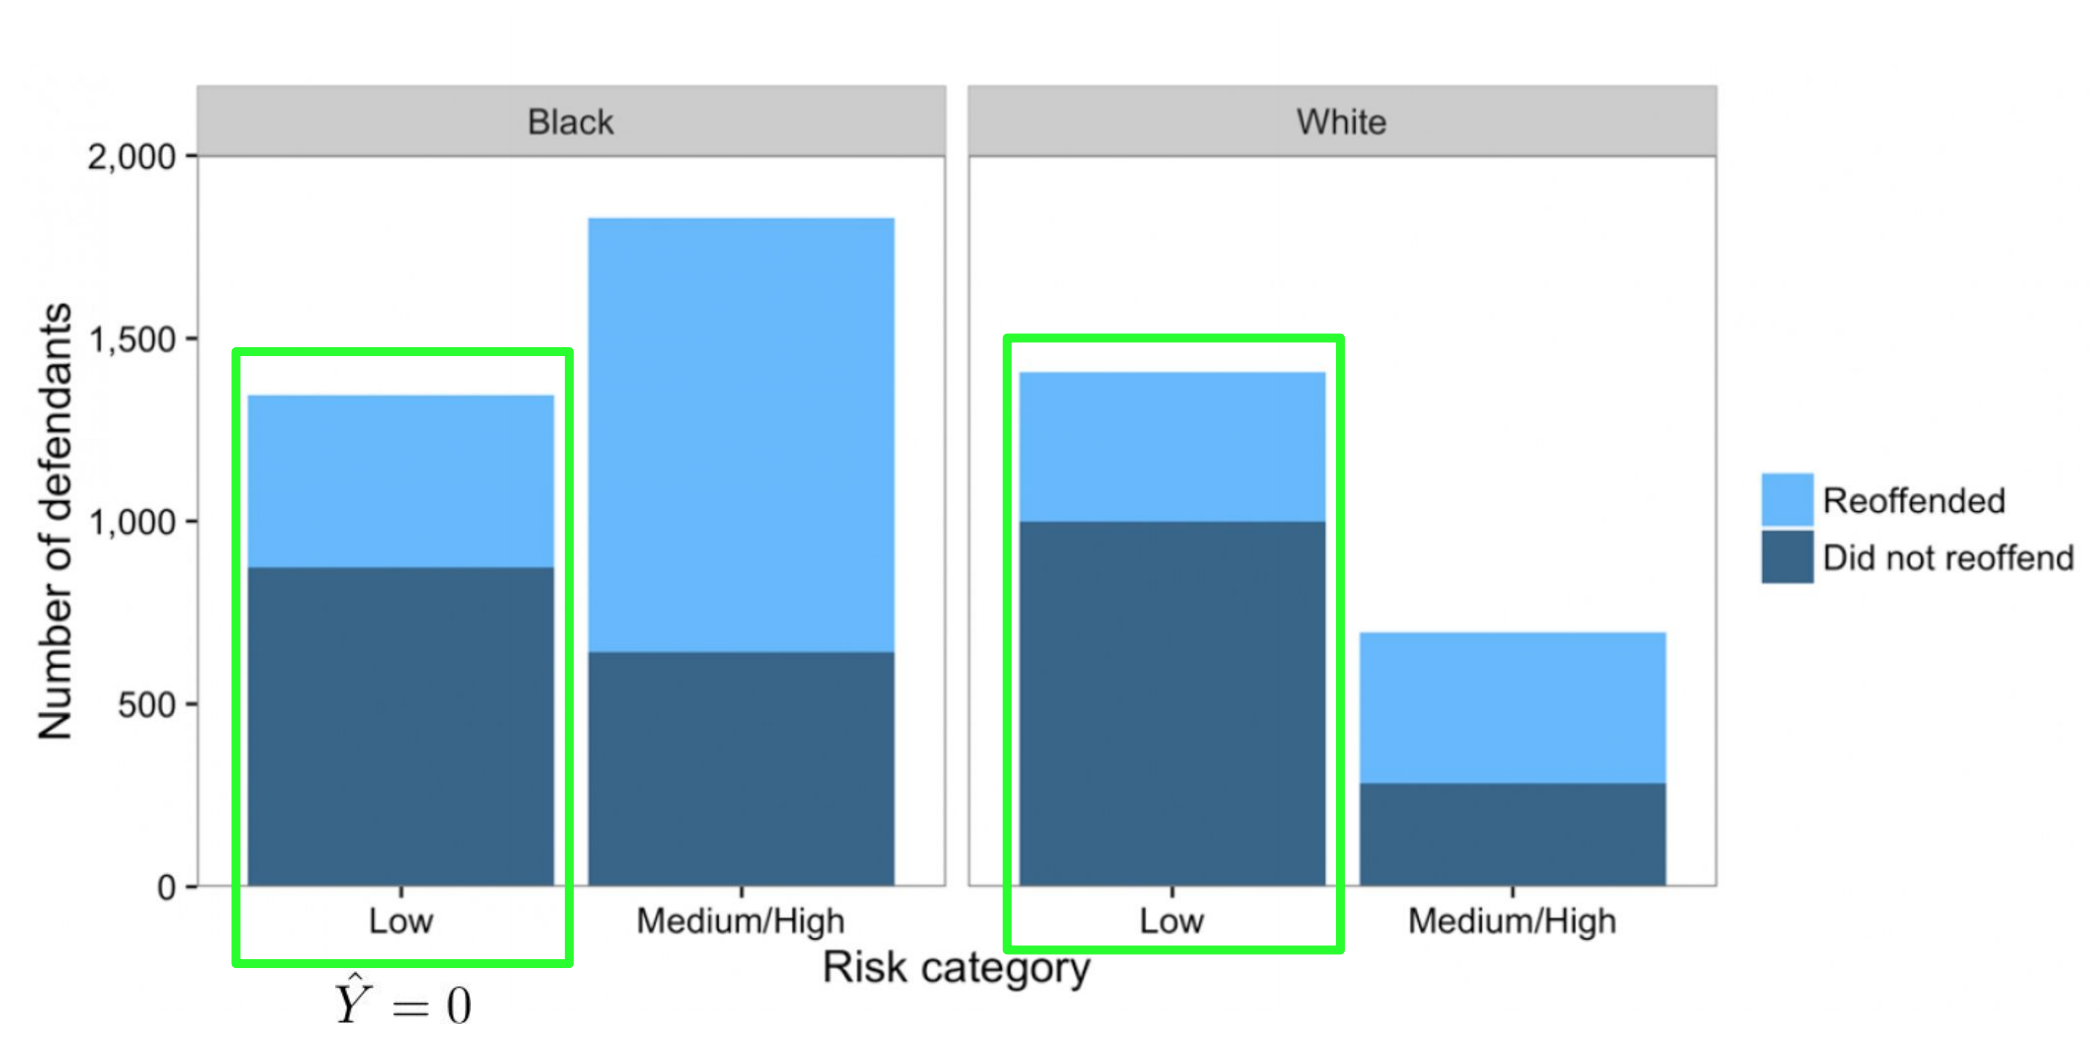

Similarly, for those individuals who were assigned a high-risk score, an equal percentage of people did not reoffend in both the groups. Thus, the data does seem to obey predictive parity.

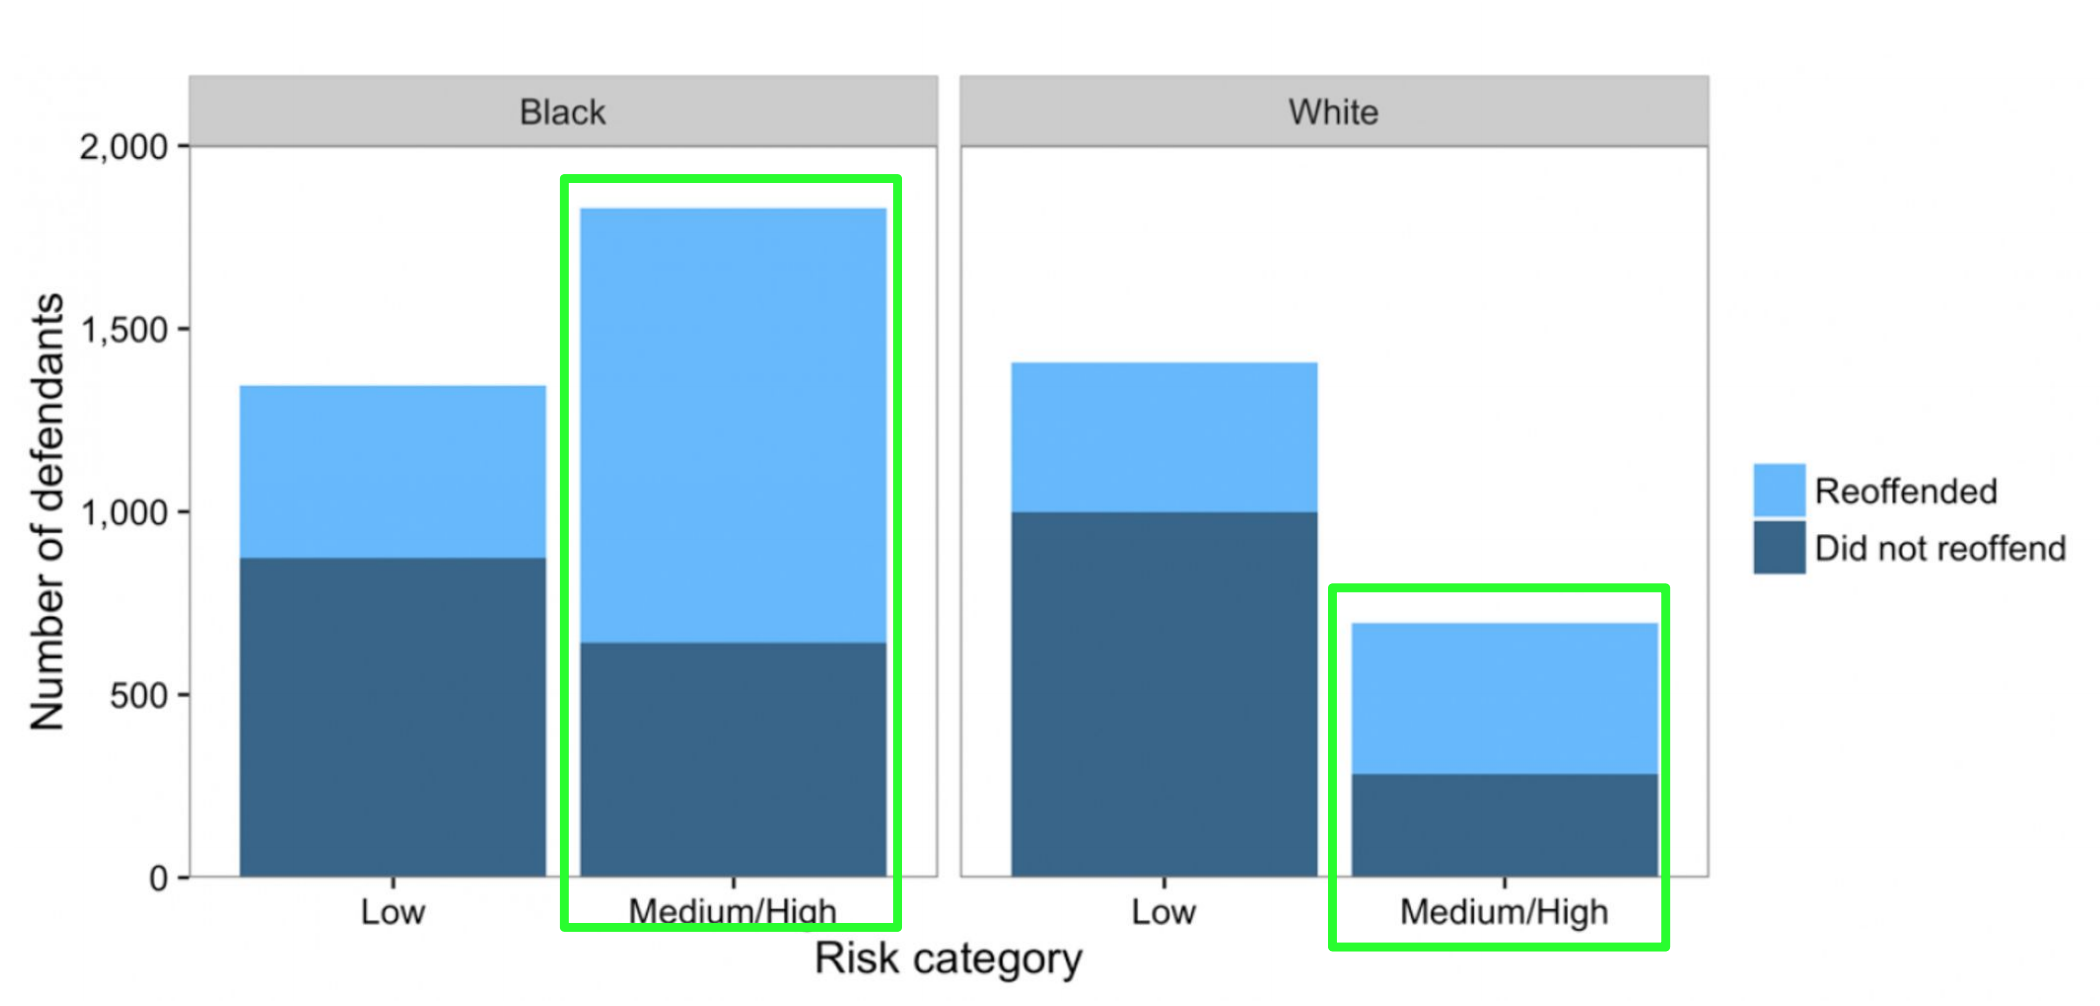

However, looking at the number of people who were assigned a high risk clearly shows that black people were more likely to be assigned a high risk score compared to those who were assigned a low risk score. Therefore, the criteria of equal false positive rates is clearly not satisfied.

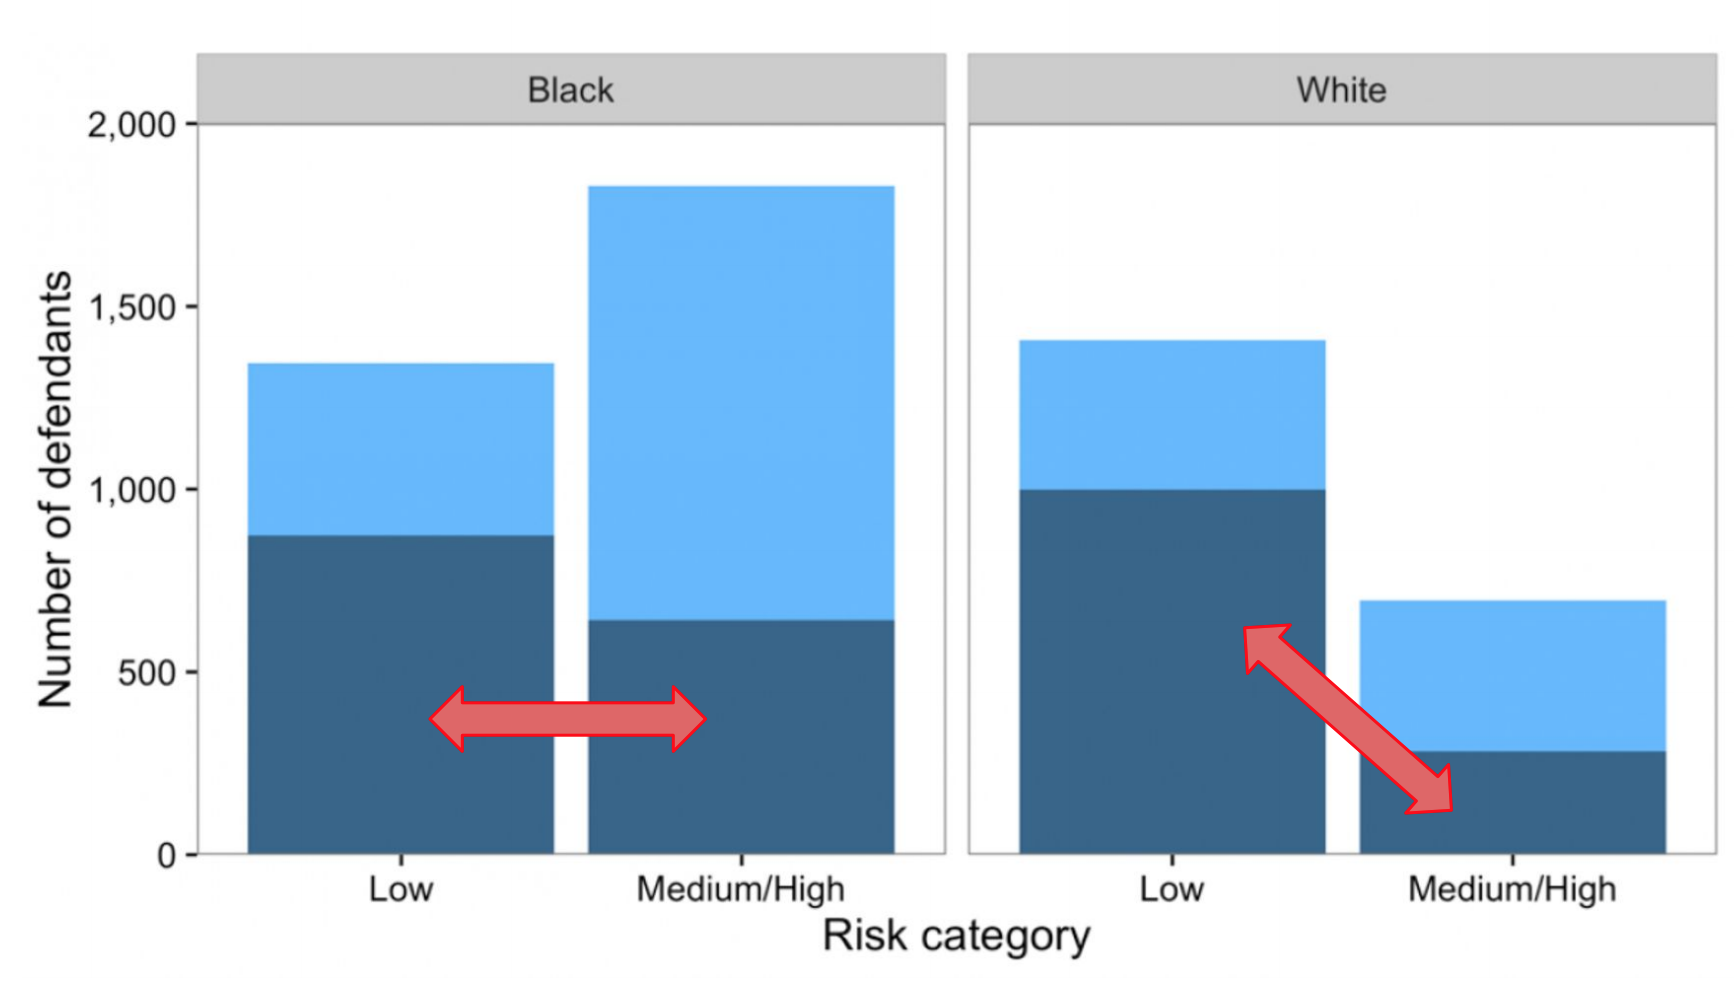

The above disparity sparked intense debates on what the ideal definition of fairness should be, and how conflicts arising in cases like this be resolved.

What one needs to understand is that finding a single defintion of fairness that fits all kinds of problem scenarios will be a futile attempt. Each instance of a problem might have its own considerations, and the appropriate fairness definition to choose is up for computational, political and philosophical debate.

While numerous research works have established the presence of bias in machine learning models, proper visualization serves as a powerful stimulus to assess the extent of bias that present in them. Visualizing datasets is an essential component to identify potential sources of bias and unfairness.

### Causality

The goal of most, if not all, statistical inference is to uncover causal relationships. 

To motivate the idea of causality, consider the following example. In 2012, the New England Journal published the figure below which shows that the number of Nobel laureates per 10 million people increases significantly when the population increases.

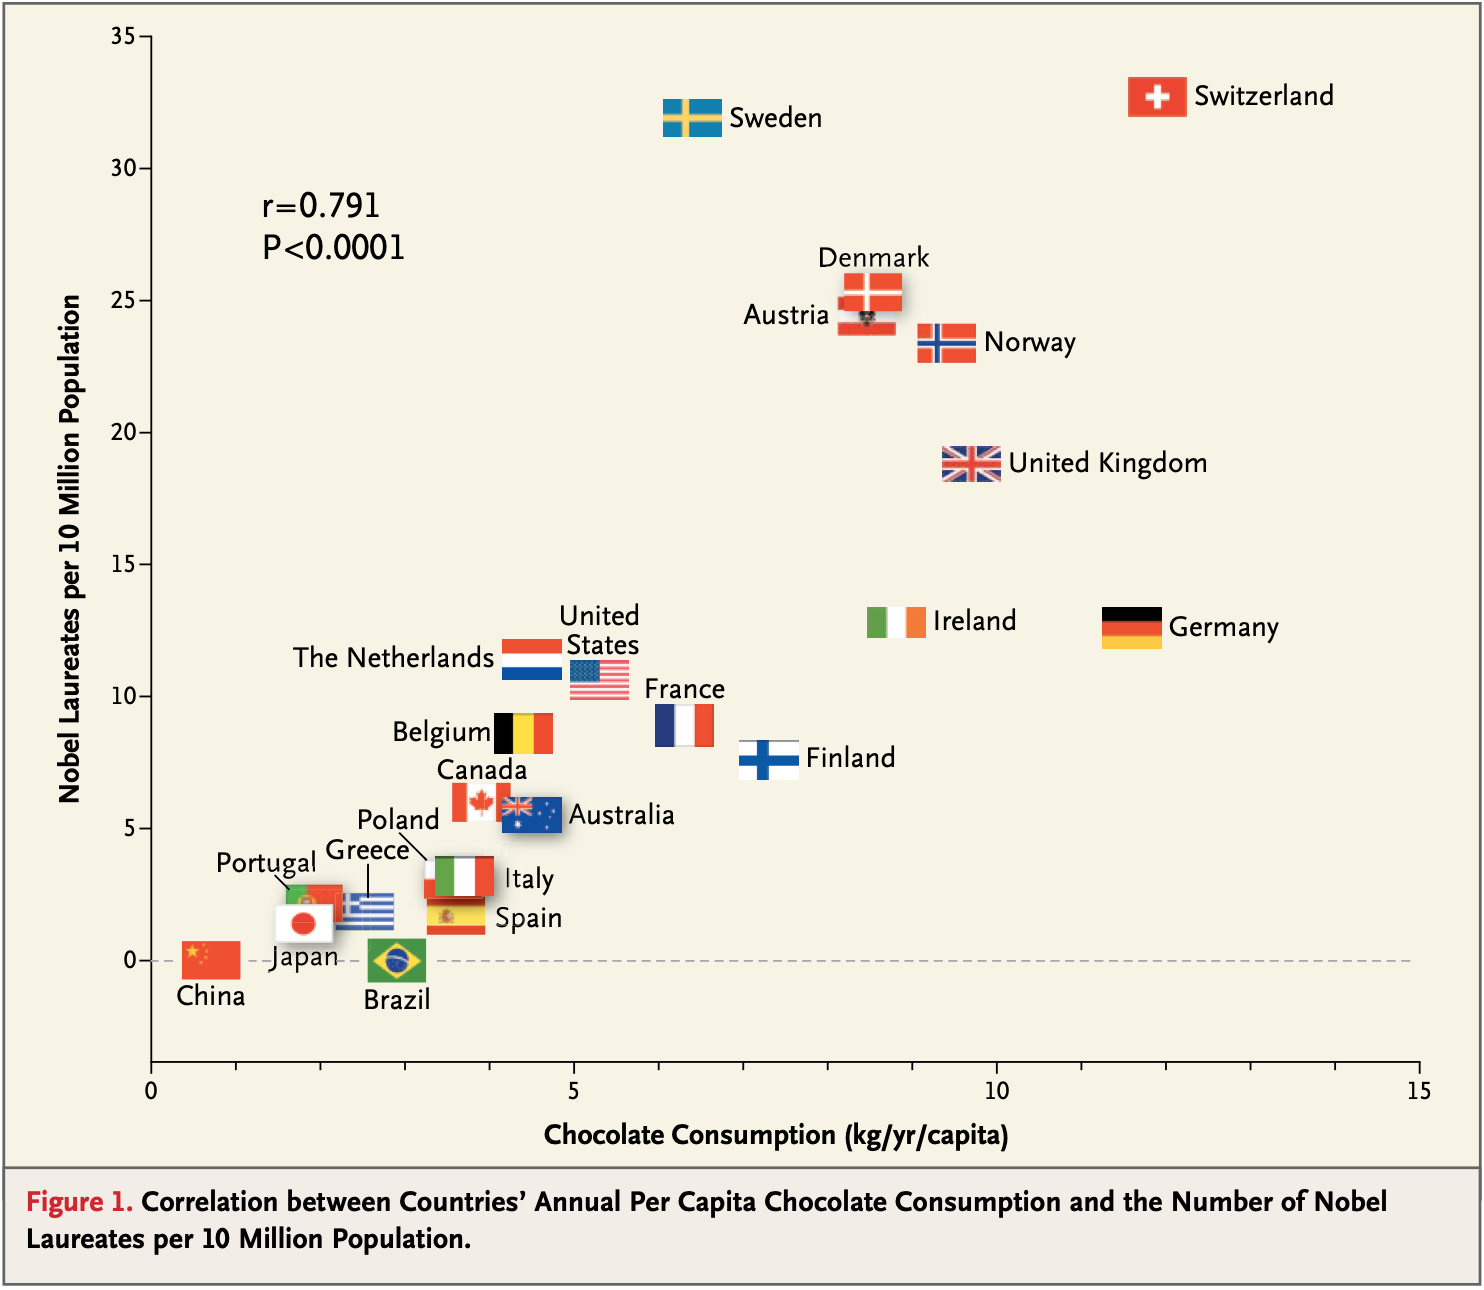

As evident by the correlation and the p-value, the relationship between Nobel prize winning and choclate consumption is quite strong. Can we call this association a causal relationship? Most of us would correctly guess that this would not be the case. There could be other reasons that could explain this association. For example, one of the reasons could be that chocolate consumption could be considered as a proxy for GDP, and higher GDP generally means higher standards of living and higher quality of education, which in turn means a higher probability of academic and scientific success.

However, suppose a person who, as of now, has no hopes of winning the Nobel, starts eating chocolates, a copious amount of them for the next four years, and ends up winning the Nobel prize after four years. Would it then be justifiable for us to say it was the chocolate that caused the person to win the Nobel prize? Again, as one would reasonably guess, this would still not be the case. One of the reasons why it is so is that we don’t know what would have happened had the person not consumed that much chocolate. Maybe he would have won the Nobel prize irrespective of the amount of chocolate he consumed, or maybe he would have won it earlier had he eaten the same amount of ice cream.

What the above thought experiment demonstrates is that irrespective of whether one has studied causal inference or not, most of us have some level of understanding of what a causal effect is.


### Observational Causal Modeling

The gold standard for discovering causal graph is to conduct randomised control trails (RCT). However, in most cases conducting RCTs would not be possible, or would just be unethical. Therefore, in most cases, researchers resort to constructing the graph based on observational data. 

Recovering the causal structure of a set of observed data is an active area of research. Causal discovery involves determining the causal structure, which is represented as a Directed Acyclic Graph (DAG), of a set of features based on observational data. Once the underlying causal structure is determined, one assumes that the data was generated by using a set of functions (for each feature, the function would depend on the feature's causes, and a random noise variable) for each of the features. This viewpoint of the generative process is called Functional Causal Modelling (FCM), which involves determining functions to generate a feature given the values of all of its parents, while following the topological order of the graph.

Authors of [4] provide a succinct formal description of observational causal modeling. Let $X = [X_{1}, \ldots, X_{d}]$ denote a vector of d random variables, with unknown joint probability distribution $p(x)$. It is assumed that an iid $n$-sample is drawn after $p(x)$, noted $D = \{x^{(1)},\ldots, x^{(n)}\}$, with $x^{(\ell)} = (x^{(\ell)}_1, \ldots, x^{(\ell)}_d)$ and $x^{(l)}_j$ the $\ell$-th sample of $X_j$.

#### Functional Causal Models

Functional Causal Models are defined as a pair $(\mathcal{G}, f)$, with $\mathcal{G}$ a directed acyclic graph and $f = (f_1,\ldots, f_d)$ a set of $d$ causal mechanisms. Formally, each variable $X_j$ follows a distribution described as: 
\begin{equation}  
{X}_j \sim f_j({X}_{Pa(j; \mathcal{G})}, {E}_j),\textrm{ with } {E}_j \sim \mathcal{N}(0,1)\ \mbox{ for } j=1,\ldots, d.
    \label{eq:fcm}
\end{equation}

$Pa{(j; \mathcal{G})}$ is the set of parents of $X_j$ in $\mathcal{G}$, $f_j$ is a function from $\mathbb{R}^{|Pa{(j; \mathcal{G})}|+1} \rightarrow \mathbb{R}$ and ${E}_j$ is a unit centered Gaussian noise\footnote{Note that this is not an actual restriction on the FCM space, as any type of noise can be modeled as some $g(E)$ with $g$ a function and $E$ a Gaussian noise, accounting for all unobserved causes of $X_j$.

A 5-variable FCM is depicted in the figure below.

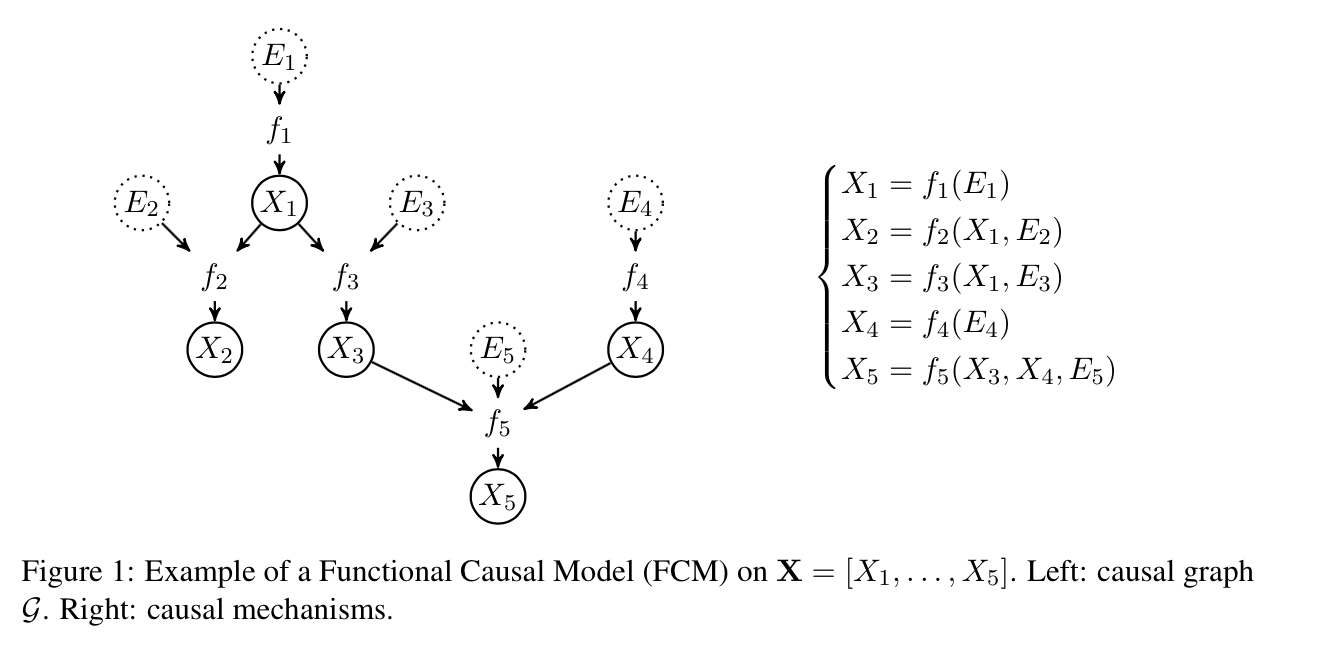

The above equations provide a framework to not only learn the causal graph, but also to learn the functions which could then be used to generate more data.

In case of measuring fairness using causal methods, an interesting trend that we noticed was that authors have assumed that the causal graph that they use is infact the ground truth. 

In [20], the author argues that accounting for underlying causal mechanisms is necessary to achieve truly fair algorithms, and that using features decorrelated from the protected attributes is only a short-term solution.

Let us now look at a few definitions of fairness based on causality.

#### Fairness through Unawareness

A typical learning algorithm would be trained on both the sensitive attribute A and the non-sensitive attributes X, i.e., $Y \approx f(X, A)$. One naive way to make algorithms fair would be to train the function f only on X, i.e., $Y \approx f(X)$. This is essentially the idea behind the "Fairness through Causal Unawareness" paradigm. 

As pointed out in [20], protected and unprotected attributes are strongly correlated. For example, suppose the features that we have are an individual's race and their educational qualification, and we wish to determine recipients of a scholarship. In this case, the individual's race will be the protected attribute, so the above method will learn a model based on the individual's educational qualifications only. However, it is quite obvious that an individual's educational qualifications and their race are correlated (the level of correlation could be high or low depending on the region in consideration), and hence, removing the protected attribute does no good.

Thus it turns out, unless we are absolutely sure about which features are introducing unfairness into the system, it will not be possible to come up with fair algorithms. Thus the concept of introducing causal systems naturally fits in.

#### Definition of Fairness based on Causal Structure - Counterfactual Fairness

Consider the causal model defined by Pearl [cite]: A causal model is defined as a triple (U, V, F) of sets such that:

* U is a set of latent background variables, which are factors not caused by any variable in the set V of observable variables $(V \equiv A \cup X)$;

* F is a set of functions ${f_{1}, \ldots, f_{n}}$, one for each $V_{i} \in V$, such that $V_{i} = f_{i}(pa_{i},U_{pa_{i}})$, $pa_{i} \subseteq V - {V_{i}}$ and $U_{pa_{i}} \subseteq U$. Such equations are also known as structural (functional) equations.

where $pa_{i}$ refers to the parents of $V_{i}$ in the corresponding causal graph. 

An **intervention** on a variable $V_{i}$ is the substitution of equation $V_{i} = f_{i}(pa_{i}, U_{pa_{i}})$ with the equation $V_{i} = v$ for some $v$.

**Counterfactuals** are generally better explained with the help of examples. An ideal counterfactual statement would be of the form - "The value of Y if Z had taken the value $z$". Thinking in counterfactuals requires imagining a hypothetical reality that contradicts observed facts. The counterfactual is modeled as a solution for Y, given U = $u$ and where the equations for Z are replaced by Z = $z$. This is denoted by $Y_{Z \leftarrow z}(u)$ or simply as $Y_{z}$.

Counterfactual inference (assigning values to variables) proceeds in the following three steps:
1. **Abudction** - For a given prior on U, compute the posterior distribution of U given the evidence W = $w$
2. **Action** - Substitute the equations for Z with the interventional values $z$, resulting in the modified set of equations $F_{z}$
3. **Prediction** - Compute the implied distribution on the remaining elements of V using $F_{z}$ and the posterior P(U | W = $w$)

Counterfactual fairness is then defined as - Predictor $\hat{Y}$ is counterfactually fair if under any X = $x$ and A = $a$,

$$p(\hat{Y}_{A \leftarrow a} (U) = y | X = x, A = a) = p(\hat{Y}_{A \leftarrow a'} (U) = y | X = x, A = a)$$

for all y and for any value $a'$ attainable by A.

In simpler words, while performing counterfactual fairness, we place the original value of the sensitive attribute by one of its other possible values, and propagate its new value down the causal graph. This propagaiton will only affect those variables which are descendants of the sensitive attribute. 

An immediate implication of the above definition is that $\hat{Y}$ will be counterfactually fair if it is a function of the non-descendants of A. Suppose W is some non-descendant of A in the causal graph. Then $W_{A \leftarrow a}(U)$ and $W_{A \leftarrow a'} (U)$ will have the same distribution. Hence, the distribution of any function $\hat{Y}$ of the non-descendants of A is invariant with respect to the counterfactual values of A.

As mentioned previously, a drawback of these causal graph based approaches is that they make assumptions on the structures of the causal graph. In most cases, there are multiple possible causal graphs that could satisfy the given data. In some instances of the causal graph, we might end up removing all the important features, leading to significant accuracy loss. Thus active and collaborative research between experts on fairness and causal inference is necessary to ensure that machine learning algorithms are interpretable and fair.

### References

[1] https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html

[2] Buolamwini, J. and Gebru, T., 2018. Gender Shades: Intersectional Accuracy Disparities in Commercial Gender Classification. FAT/ML.

[3] Tatman, R. and Kasten, C. 2017. Effects of Talker Dialect, Gender & Race on Accuracy of Bing Speech and YouTube Automatic Captions. INTERSPEECH.

[4] Diviyan Kalainathan, Olivier Goudet, Isabelle Guyon, David Lopez-Paz, Michèle Sebag. SAM: Structural Agnostic Model, Causal Discovery and Penalized Adversarial Learning. 2018. ⟨hal-01864239⟩

[5] https://github.com/marceloprates/Gender-Bias - Gender Bias

[6] http://wordbias.umiacs.umd.edu/ - Gender bias in word embeddings

[7] https://arxiv.org/pdf/1907.06430.pdf - A Causal Bayesian Networks Viewpoint on Fairness

[8] Pearl, J. Causality: Models, Reasoning and Inference. Cambridge University Press, 2000. 3, 4,
5, 7

[9] Counterfactual fairness - https://papers.nips.cc/paper/6995-counterfactual-fairness.pdf

[10] https://christophm.github.io/interpretable-ml-book/counterfactual.html

[11] http://gendershades.org/overview.html

[12] https://pyvis.readthedocs.io/en/latest/tutorial.html

[13] Messerli, F. H. (2012). Chocolate Consumption, Cognitive Function, and Nobel Laureates. New England Journal of Medicine, 367(16), 1562–1564. doi:10.1056/nejmon1211064 

[14] https://christophm.github.io/interpretable-ml-book/counterfactual.html

[15] https://towardsdatascience.com/deepmind-is-using-this-old-technique-to-evaluate-fairness-in-machine-learning-models-f33bce98196e

[16] https://slideslive.com/38917412/safe-machine-learning

[17] https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

[18] Jon Kleinberg. 2018. Inherent Trade-Offs in Algorithmic Fairness. SIGMETRICS Perform. Eval. Rev. 46, 1 (June 2018), 40-40. DOI: https://doi.org/10.1145/3292040.321963

[19] Kleinberg, J.M., Mullainathan, S., & Raghavan, M. (2016). Inherent Trade-Offs in the Fair Determination of Risk Scores. ArXiv, abs/1609.05807.

[20] https://arxiv.org/pdf/1412.4643.pdf

[21] Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings

### Appendix

### Ideas we couldn't implement

#### Face Detection bias present in popular face detection APIs
To further illustrate the idea of bias in machine learning models, we had planned to show results of face detection by face detection APIs of Google, Microsoft and Face++. A similar study was done by researchers at the MIT Media Lab [11], where they curated a dataset and checked the accuracy of face detection packages provided by the above three companies. They report the accuracy results of the above packages as below:

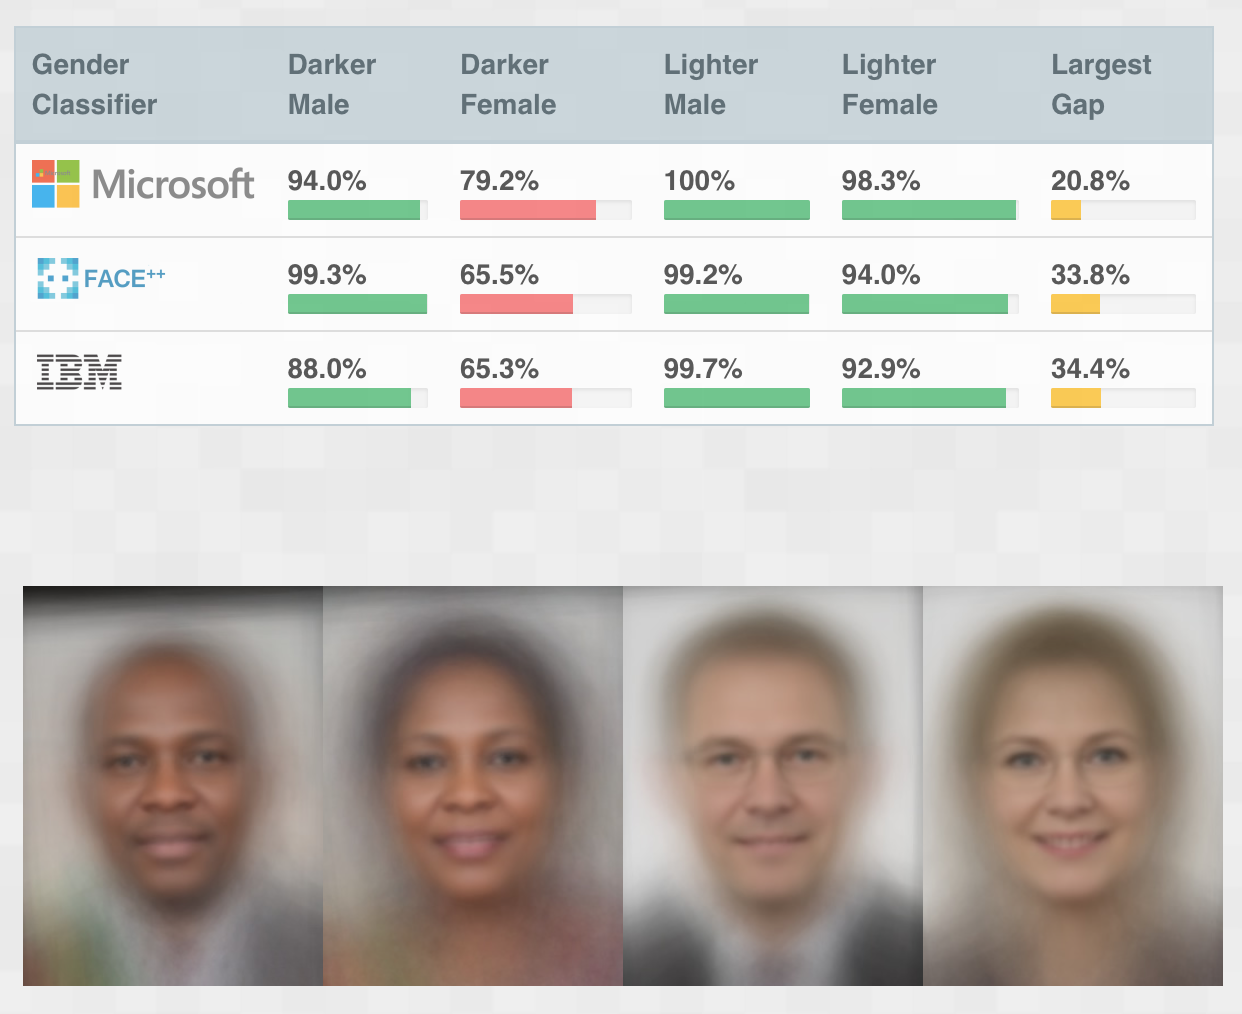

They also report that 93.6% of the faces misgendered by Microsoft's Azure Face API were those of darker subjects.

We also planned to do a similar kind of a study using the Transparent Latent-Space GAN, which can be used to control various features of a person's face. Below is a GIF which depicts the same:

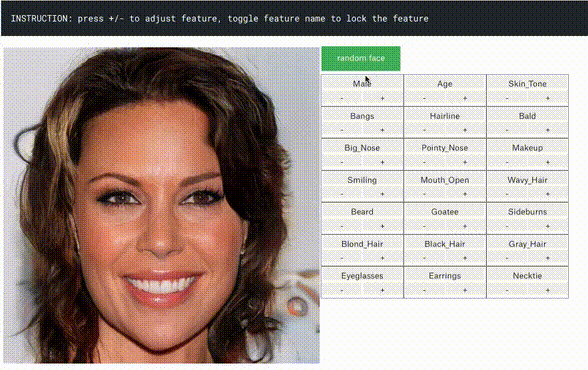

Using this GAN would have given us a much larger sample space than the one used by the authors of [11]. However, we faced problems compiling the code on our laptops, and the Kaggle kernel they provided had some issues as well.

#### Google's What-if Tool

We also planned to implement an interface that would have allowed the user to change values of certain features of samples. This would have helped illustrate the concept of intervention and counterfactuals. However, we couldn't implement it in time. We also soon realised that Google has implemented something quite similar, called the What-if Toolbox. 

#### A Causal Bayesian Networks Viewpoint on Fairness

We planned to discuss this paper which uses causal graphs to illustrate unfairness in a dataset. They use it to measure unfairness and design fair models in unfair scenarios

#### Achieving Causal Fairness through Generative Adversarial Networks

The authors of this paper aim to learna distribution similar to the given dataset while ensuring various causal fairness criteria based on a given causal graph. They use two generators whose structures reflect that structure of the causal graph, which helps them to simulate the underlying causal model. They also use two discriminators for producing close-to-real distribution, while also achieving various fairness criteria based on causal quantities simulated by the generators. The authors also establish a link between their GAN and the notion of Counterfactual fairness.